# 911 Calls

For this project, I will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

## Data and Setup

____
** Importing numpy and pandas **

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

** Reading in the csv file using pandas as a dataframe called df **

In [4]:
df = pd.read_csv("911.csv")
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [6]:
df.describe()

,lat,lng,zip,e
count,99492.000000,99492.000000,86637.000000,99492.0
mean,40.159526,-75.317464,19237.658298,1.0
std,0.094446,0.174826,345.344914,0.0
min,30.333596,-95.595595,17752.000000,1.0
25%,40.100423,-75.392104,19038.000000,1.0
50%,40.145223,-75.304667,19401.000000,1.0
75%,40.229008,-75.212513,19446.000000,1.0
max,41.167156,-74.995041,77316.000000,1.0


## Asking and answering questions:

** What are the top 5 zipcodes for 911 calls? **

In [7]:
df["zip"].unique()

array([19525., 19446., 19401.,    nan, 19044., 19426., 19438., 19462.,
       19428., 19040., 19027., 18936., 18974., 19031., 19403., 19422.,
       19085., 18964., 19038., 19406., 19468., 19010., 19095., 19464.,
       19444., 19041., 19440., 19405., 19002., 19096., 19454., 19465.,
       19004., 19066., 19072., 18041., 19046., 19090., 19012., 19025.,
       19473., 18073., 18969., 18074., 19460., 19001., 18054., 19009.,
       19006., 19035., 19150., 19075., 19034., 19151., 19453., 19003.,
       18914., 19512., 18976., 19120., 18915., 18076., 19477., 19087.,
       18966., 19131., 19128., 19083., 19053., 19475., 18960., 19504.,
       18070., 19492., 18932., 19118., 18092., 19490., 19518., 18056.,
       19119., 19107., 18103., 17752., 19111., 18927., 19435., 18951.,
       19472., 19503., 19126., 19505., 19423., 19138., 36107., 18036.,
       19116., 19139., 19129., 19115., 19355., 77316., 19457., 19082.,
       19127.])

In [8]:
df["zip"].value_counts()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
           ... 
77316.0       1
19457.0       1
19139.0       1
19119.0       1
17752.0       1
Name: zip, Length: 104, dtype: int64

In [9]:
df["zip"].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [10]:
# Solution:

df["zip"].value_counts().iloc[0:5]

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

** What are the top 5 townships for 911 calls? **

In [11]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [12]:
df["twp"].value_counts()

LOWER MERION     8443
ABINGTON         5977
NORRISTOWN       5890
UPPER MERION     5227
CHELTENHAM       4575
                 ... 
BRYN ATHYN        173
SALFORD           163
GREEN LANE         51
PHILA COUNTY       43
LEHIGH COUNTY      30
Name: twp, Length: 68, dtype: int64

In [13]:
# Similarly, the solution is:
    
df["twp"].value_counts().iloc[0:5]

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

** How many unique title codes are there? **

In [14]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [15]:
df["title"]

0             EMS: BACK PAINS/INJURY
1            EMS: DIABETIC EMERGENCY
2                Fire: GAS-ODOR/LEAK
3             EMS: CARDIAC EMERGENCY
4                     EMS: DIZZINESS
                    ...             
99487    Traffic: VEHICLE ACCIDENT -
99488    Traffic: VEHICLE ACCIDENT -
99489               EMS: FALL VICTIM
99490           EMS: NAUSEA/VOMITING
99491    Traffic: VEHICLE ACCIDENT -
Name: title, Length: 99492, dtype: object

In [16]:
df["title"].unique()

array(['EMS: BACK PAINS/INJURY', 'EMS: DIABETIC EMERGENCY',
       'Fire: GAS-ODOR/LEAK', 'EMS: CARDIAC EMERGENCY', 'EMS: DIZZINESS',
       'EMS: HEAD INJURY', 'EMS: NAUSEA/VOMITING',
       'EMS: RESPIRATORY EMERGENCY', 'EMS: SYNCOPAL EPISODE',
       'Traffic: VEHICLE ACCIDENT -', 'EMS: VEHICLE ACCIDENT',
       'Traffic: DISABLED VEHICLE -', 'Fire: APPLIANCE FIRE',
       'EMS: GENERAL WEAKNESS', 'Fire: CARBON MONOXIDE DETECTOR',
       'EMS: UNKNOWN MEDICAL EMERGENCY', 'EMS: UNRESPONSIVE SUBJECT',
       'Fire: VEHICLE ACCIDENT', 'EMS: ALTERED MENTAL STATUS',
       'Fire: FIRE ALARM', 'EMS: CVA/STROKE',
       'Traffic: ROAD OBSTRUCTION -', 'EMS: SUBJECT IN PAIN',
       'EMS: HEMORRHAGING', 'EMS: FALL VICTIM', 'EMS: ASSAULT VICTIM',
       'EMS: SEIZURES', 'EMS: MEDICAL ALERT ALARM',
       'EMS: ABDOMINAL PAINS', 'Fire: PUMP DETAIL',
       'Fire: FIRE INVESTIGATION', 'EMS: OVERDOSE', 'EMS: MATERNITY',
       'EMS: UNCONSCIOUS SUBJECT', 'EMS: CHOKING', 'EMS: LACERATIONS',
     

In [17]:
# Solution:

len(df["title"].unique())

110

In [18]:
# or use:

df["title"].nunique()

110

## Creating new features

** In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic.
I will be using the apply method ".apply()" with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

In [19]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [20]:
df["title"]

0             EMS: BACK PAINS/INJURY
1            EMS: DIABETIC EMERGENCY
2                Fire: GAS-ODOR/LEAK
3             EMS: CARDIAC EMERGENCY
4                     EMS: DIZZINESS
                    ...             
99487    Traffic: VEHICLE ACCIDENT -
99488    Traffic: VEHICLE ACCIDENT -
99489               EMS: FALL VICTIM
99490           EMS: NAUSEA/VOMITING
99491    Traffic: VEHICLE ACCIDENT -
Name: title, Length: 99492, dtype: object

In [21]:
df["title"][0]

'EMS: BACK PAINS/INJURY'

In [22]:
def func(x):
    x = x.lower()
    if "ems" in x:
        return "EMS"
    elif "traffic" in x:
        return "Traffic"
    elif "fire" in x:
        return "Fire"
    else:
        pass

In [23]:
print(func('EMS: BACK PAINS/INJURY'))

EMS


In [24]:
print(func('BACK PAINS/INJURY'))

None


In [25]:
df["title"].apply(lambda x:func(x))

0            EMS
1            EMS
2           Fire
3            EMS
4            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: title, Length: 99492, dtype: object

In [26]:
df["title"].apply(lambda x:func(x)).isnull().sum()

0

In [27]:
df["title"].apply(lambda x:func(x)).unique()

array(['EMS', 'Fire', 'Traffic'], dtype=object)

In [28]:
df["Reason"] = df["title"].apply(lambda x:func(x))
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


** What is the most common Reason for a 911 call based off of this new column? **

In [29]:
df["Reason"].value_counts()

EMS        48879
Traffic    35695
Fire       14918
Name: Reason, dtype: int64

In [30]:
df["Reason"].value_counts().idxmax()

'EMS'

In [31]:
# or use:

df["Reason"].value_counts().sort_values().tail(1)

EMS    48879
Name: Reason, dtype: int64

** Now I will use seaborn to create a simple countplot of 911 calls by Reason. **

Text(0.5, 1.0, 'Num of 911 calls by Reason')

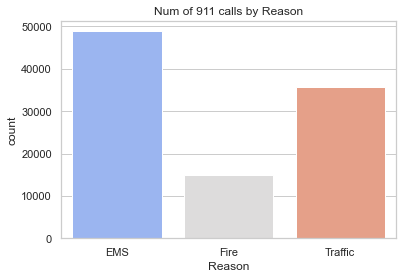

In [32]:
sns.set_style(style="whitegrid")
sns.set_context(context="notebook")

sns.countplot(x="Reason",data=df,palette="coolwarm")
plt.title("Num of 911 calls by Reason")

___
** Now I will focus on the time information. What is the data type of the objects in the timeStamp column? **

In [33]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
 9   Reason     99492 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 7.6+ MB


In [35]:
df["timeStamp"].head()

0    2015-12-10 17:40:00
1    2015-12-10 17:40:00
2    2015-12-10 17:40:00
3    2015-12-10 17:40:01
4    2015-12-10 17:40:01
Name: timeStamp, dtype: object

In [36]:
df["timeStamp"].dtypes

dtype('O')

In [37]:
# Also:
df["timeStamp"].iloc[0]

'2015-12-10 17:40:00'

In [38]:
type(df["timeStamp"].iloc[0])

str

** The timeStamp column is an object dtype. I will convert the column from strings to DateTime objects. **

In [41]:
df["timeStamp"] = pd.to_datetime(arg=df["timeStamp"])
df["timeStamp"]

0       2015-12-10 17:40:00
1       2015-12-10 17:40:00
2       2015-12-10 17:40:00
3       2015-12-10 17:40:01
4       2015-12-10 17:40:01
                ...        
99487   2016-08-24 11:06:00
99488   2016-08-24 11:07:02
99489   2016-08-24 11:12:00
99490   2016-08-24 11:17:01
99491   2016-08-24 11:17:02
Name: timeStamp, Length: 99492, dtype: datetime64[ns]

In [42]:
df["timeStamp"].iloc[0]

Timestamp('2015-12-10 17:40:00')

In [43]:
time = df["timeStamp"].iloc[0]
time.hour

17

** Now that the timestamp column is actually comprised of DateTime objects, I will use .apply() to create 3 new columns called Hour, Month, and Day of Week. I will create these columns based off of the timeStamp column.**

In [44]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [45]:
df["timeStamp"].head()

0   2015-12-10 17:40:00
1   2015-12-10 17:40:00
2   2015-12-10 17:40:00
3   2015-12-10 17:40:01
4   2015-12-10 17:40:01
Name: timeStamp, dtype: datetime64[ns]

In [46]:
time = df["timeStamp"].iloc[0]
time

Timestamp('2015-12-10 17:40:00')

In [47]:
time.hour

17

In [48]:
time.month

12

In [50]:
time.month_name()

'December'

In [52]:
time.day_name()

'Thursday'

In [53]:
time.dayofweek

3

In [56]:
df["Day of Week"] = df["timeStamp"].apply(lambda x:x.day_name())
df["Day of Week"]

0         Thursday
1         Thursday
2         Thursday
3         Thursday
4         Thursday
           ...    
99487    Wednesday
99488    Wednesday
99489    Wednesday
99490    Wednesday
99491    Wednesday
Name: Day of Week, Length: 99492, dtype: object

In [57]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Day of Week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,Thursday
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,Thursday
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,Thursday
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,Thursday
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,Thursday


In [60]:
df["Day of Week"].value_counts().sort_values()

Sunday       12136
Saturday     13336
Thursday     14478
Monday       14680
Friday       14833
Wednesday    14879
Tuesday      15150
Name: Day of Week, dtype: int64

In [61]:
df["timeStamp"].apply(lambda x:x.hour)

0        17
1        17
2        17
3        17
4        17
         ..
99487    11
99488    11
99489    11
99490    11
99491    11
Name: timeStamp, Length: 99492, dtype: int64

In [62]:
df["Hour"] = df["timeStamp"].apply(lambda x:x.hour)

In [63]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Day of Week,Hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,Thursday,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,Thursday,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,Thursday,17
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,Thursday,17
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,Thursday,17


In [65]:
df["Hour"].value_counts()

17    6517
16    6490
15    6154
12    6029
14    5997
13    5967
18    5762
11    5543
10    5413
9     5314
8     5044
19    4908
20    4377
7     3970
21    3788
22    3283
23    2559
6     2513
0     2112
1     1721
5     1629
2     1549
3     1435
4     1418
Name: Hour, dtype: int64

In [67]:
df["timeStamp"].apply(lambda x:x.month)

0        12
1        12
2        12
3        12
4        12
         ..
99487     8
99488     8
99489     8
99490     8
99491     8
Name: timeStamp, Length: 99492, dtype: int64

In [68]:
df["Month"] = df["timeStamp"].apply(lambda x:x.month)

In [69]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Day of Week,Hour,Month
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,Thursday,17,12
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,Thursday,17,12
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,Thursday,17,12
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,Thursday,17,12
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,Thursday,17,12


In [71]:
df["Month"].unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8], dtype=int64)

** Now I will use seaborn to create another simple countplot based on the Day of Week column with the hue based off of the Reason column. **

In [82]:
df["Day of Week"].unique()

array(['Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday',
       'Wednesday'], dtype=object)

In [102]:
df["timeStamp"].apply(lambda x:x.dayofweek).unique()

array([3, 4, 5, 6, 0, 1, 2], dtype=int64)

In [109]:
dict_map = dict(zip(df["Day of Week"].unique(),df["timeStamp"].apply(lambda x:x.dayofweek).unique()))
dict_map

{'Thursday': 3,
 'Friday': 4,
 'Saturday': 5,
 'Sunday': 6,
 'Monday': 0,
 'Tuesday': 1,
 'Wednesday': 2}

In [119]:
print(dict_map.get("Friday"))
print(dict_map.get("Fri"))

4
None


In [110]:
ordered_list = sorted(df["Day of Week"].unique(),key=dict_map.get,reverse=False)
ordered_list

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

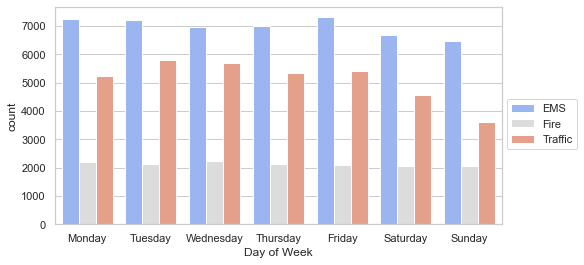

In [112]:
plt.figure(figsize=(8,4))
sns.countplot(x="Day of Week",data=df,hue=df["Reason"],palette="coolwarm",order=ordered_list)
plt.legend(loc=0,bbox_to_anchor=([1,0.6]))

**Now I will do the same for the Month column:**

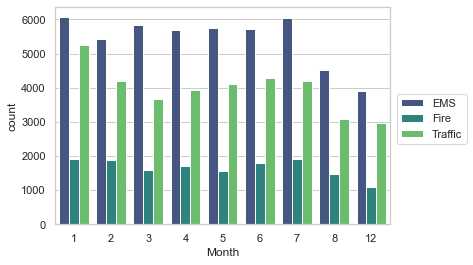

In [77]:
sns.countplot(x=df["Month"],hue=df["Reason"],palette="viridis")
plt.legend(loc=0,bbox_to_anchor=([1.02,0.6]), borderaxespad=0)

_____

** From the countplot above, it is very apparent that there are missing months from the Months column.
Because of this, I will fill in this information by plotting the information using a simple line plot that fills in the missing months. **

** I will create a gropuby object called byMonth, where I will group the DataFrame by the month column and use the count() method for aggregation. **

In [122]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Day of Week,Hour,Month
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,Thursday,17,12
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,Thursday,17,12
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,Thursday,17,12
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,Thursday,17,12
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,Thursday,17,12


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   lat          99492 non-null  float64       
 1   lng          99492 non-null  float64       
 2   desc         99492 non-null  object        
 3   zip          86637 non-null  float64       
 4   title        99492 non-null  object        
 5   timeStamp    99492 non-null  datetime64[ns]
 6   twp          99449 non-null  object        
 7   addr         98973 non-null  object        
 8   e            99492 non-null  int64         
 9   Reason       99492 non-null  object        
 10  Day of Week  99492 non-null  object        
 11  Hour         99492 non-null  int64         
 12  Month        99492 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(3), object(6)
memory usage: 9.9+ MB


In [125]:
df["Month"].unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8], dtype=int64)

In [129]:
groupby_df = df.groupby("Month").count()
groupby_df

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Day of Week,Hour
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


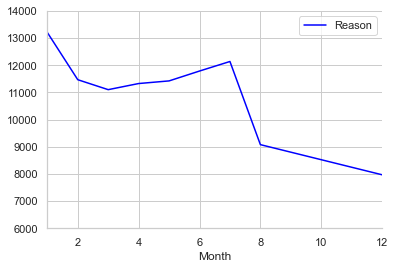

In [130]:
# the count of calls per month:

sns.set_context("notebook")
sns.set_style("whitegrid")

groupby_df.plot.line(y="Reason",c="blue",xlim=(1,12),ylim=(6000,14000))
sns.despine(top=True,right=True)
plt.legend(loc=0)

** I will now use seaborn's lmplot() to create a linear fit on the number of calls per month. **

In [131]:
groupby_df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Day of Week,Hour
Month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


In [132]:
groupby_df.reset_index()

,Month,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Day of Week,Hour
0,1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
1,2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
2,3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
3,4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
4,5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423
5,6,11786,11786,11786,10212,11786,11786,11777,11732,11786,11786,11786,11786
6,7,12137,12137,12137,10633,12137,12137,12133,12088,12137,12137,12137,12137
7,8,9078,9078,9078,7832,9078,9078,9073,9025,9078,9078,9078,9078
8,12,7969,7969,7969,6907,7969,7969,7963,7916,7969,7969,7969,7969


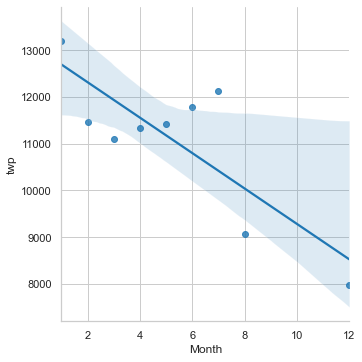

In [134]:
sns.lmplot(x="Month",y="twp",data=groupby_df.reset_index())

In [ ]:
# There is seasonal data involved so in this case a linear model might not be the best fit.
# Hence, a larger shaded area indicating error in he months where there is less information.

**Now I will create a new column called 'Date' that contains the date from the timeStamp column. ** 

In [135]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Day of Week,Hour,Month
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,Thursday,17,12
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,Thursday,17,12
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,Thursday,17,12


In [136]:
df["timeStamp"].head(2)

0   2015-12-10 17:40:00
1   2015-12-10 17:40:00
Name: timeStamp, dtype: datetime64[ns]

In [137]:
time = df["timeStamp"].iloc[0]
time

Timestamp('2015-12-10 17:40:00')

In [138]:
time.date()

datetime.date(2015, 12, 10)

In [142]:
time.time()

datetime.time(17, 40)

In [139]:
df["timeStamp"].apply(lambda x:x.date())

0        2015-12-10
1        2015-12-10
2        2015-12-10
3        2015-12-10
4        2015-12-10
            ...    
99487    2016-08-24
99488    2016-08-24
99489    2016-08-24
99490    2016-08-24
99491    2016-08-24
Name: timeStamp, Length: 99492, dtype: object

In [140]:
df["Date"] = df["timeStamp"].apply(lambda x:x.date())

In [141]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Day of Week,Hour,Month,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,Thursday,17,12,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,Thursday,17,12,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,Thursday,17,12,2015-12-10


** Now I will group by this Date column with the count() aggregate and create a plot of counts of 911 calls.**

In [151]:
df1 = df.groupby("Date").count()
df1

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Day of Week,Hour,Month
Date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-20,328,328,328,279,328,328,328,327,328,328,328,328,328
2016-08-21,357,357,357,299,357,357,357,352,357,357,357,357,357
2016-08-22,389,389,389,336,389,389,388,384,389,389,389,389,389


Text(0.5, 1.0, 'Date vs Lat')

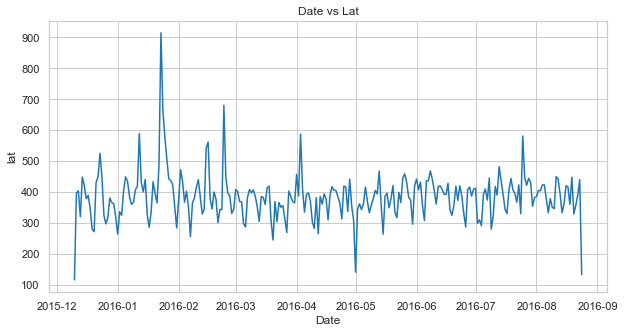

In [156]:
fig, axes = plt.subplots(nrows=1,ncols=1,figsize=(10,5))

sns.lineplot(x="Date",y="lat",data=df1)
axes.set_title("Date vs Lat")

** Now I will recreate this plot but creating 3 separate plots with each plot representing a Reason for the 911 call**

In [147]:
df[df["Reason"]=="Traffic"].groupby("Date").count()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Day of Week,Hour,Month
Date,,,,,,,,,,,,,
2015-12-10,43,43,43,35,43,43,43,41,43,43,43,43,43
2015-12-11,141,141,141,108,141,141,141,137,141,141,141,141,141
2015-12-12,146,146,146,109,146,146,146,144,146,146,146,146,146
2015-12-13,78,78,78,54,78,78,78,76,78,78,78,78,78
2015-12-14,186,186,186,150,186,186,186,184,186,186,186,186,186
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-08-20,117,117,117,93,117,117,117,116,117,117,117,117,117
2016-08-21,138,138,138,105,138,138,138,133,138,138,138,138,138
2016-08-22,156,156,156,127,156,156,156,152,156,156,156,156,156


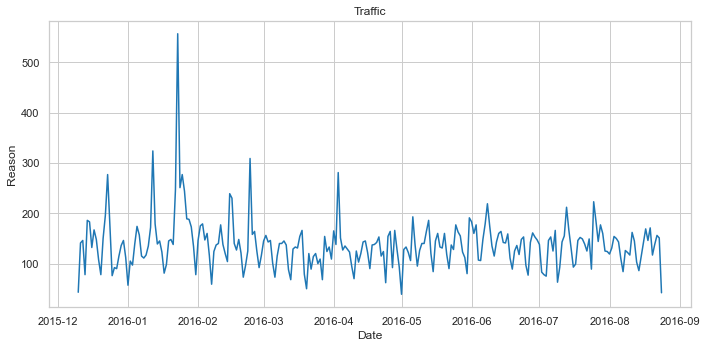

In [148]:
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(10,5))
sns.lineplot(x="Date",y="Reason",data=df[df["Reason"]=="Traffic"].groupby("Date").count())
axes.set_title("Traffic")
plt.tight_layout()

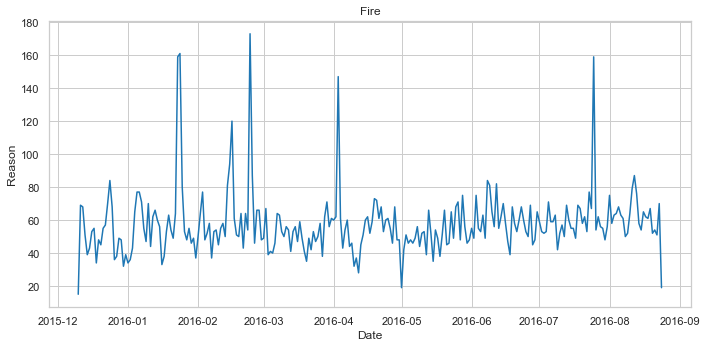

In [149]:
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(10,5))
sns.lineplot(x="Date",y="Reason",data=df[df["Reason"]=="Fire"].groupby("Date").count())
axes.set_title("Fire")
plt.tight_layout()

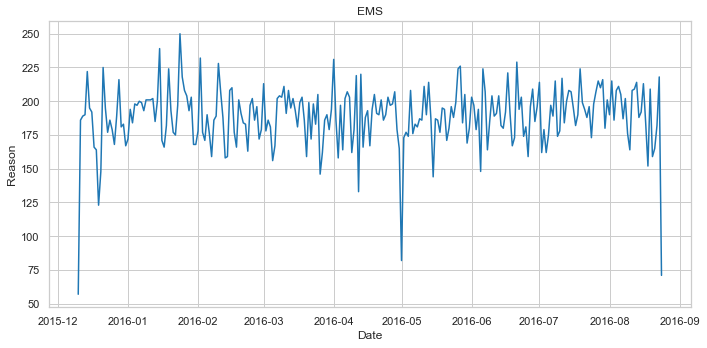

In [150]:
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(10,5))
sns.lineplot(x="Date",y="Reason",data=df[df["Reason"]=="EMS"].groupby("Date").count())
axes.set_title("EMS")
plt.tight_layout()

____
** Now I will be creating  heatmaps with seaborn. To do this, I'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week.**

In [157]:
df.head(2)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Day of Week,Hour,Month,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,Thursday,17,12,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,Thursday,17,12,2015-12-10


In [160]:
df1 = df.groupby(by=["Day of Week","Hour"]).count()
df1

lat  lng  desc  zip  title  timeStamp  twp  addr    e  \
Day of Week Hour                                                          
Friday      0     275  275   275  248    275        275  275   275  275   
            1     235  235   235  200    235        235  235   232  235   
            2     191  191   191  165    191        191  191   191  191   
            3     175  175   175  164    175        175  175   175  175   
            4     201  201   201  184    201        201  201   201  201   
...               ...  ...   ...  ...    ...        ...  ...   ...  ...   
Wednesday   19    686  686   686  590    686        686  686   682  686   
            20    668  668   668  597    668        668  668   662  668   
            21    575  575   575  508    575        575  574   572  575   
            22    490  490   490  432    490        490  490   485  490   
            23    335  335   335  294    335        335  334   335  335   

                  Reason  Month  Date  
Day of Week Hour                       
Friday      0        275    275   275  
            1        235    235   235  
            2        191    191   191  
            3        175    175   175  
            4        201    201   201  
...                  ...    ...   ...  
Wednesday   19       686    686   686  
            20       668    668   668  
            21       575    575   575  
            22       490    490   490  
            23       335    335   335  

[168 rows x 12 columns]

In [161]:
df1["Reason"]

Day of Week  Hour
Friday       0       275
             1       235
             2       191
             3       175
             4       201
                    ... 
Wednesday    19      686
             20      668
             21      575
             22      490
             23      335
Name: Reason, Length: 168, dtype: int64

In [162]:
df1["Reason"].unstack(level=-1)

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Friday,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Monday,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Saturday,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sunday,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thursday,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tuesday,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wednesday,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


In [164]:
df1 = df.groupby(by=["Day of Week","Hour"]).count()["Reason"].unstack(level=-1)
df1

# As a way to understand this DataFrame, on Friday at Hour 0, there were "275" 911 calls.

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
Day of Week,,,,,,,,,,,,,,,,,,,,,
Friday,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Monday,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Saturday,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sunday,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thursday,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tuesday,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wednesday,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


** Now I will create a HeatMap using this new DataFrame called df1. **

Text(0.5, 1.0, 'Day of Week vs Hour')

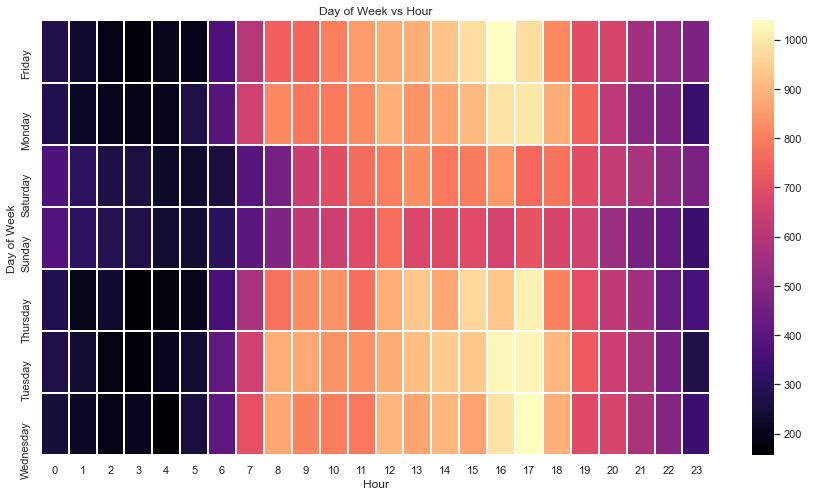

In [165]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(15,8))

sns.heatmap(data=df1, cmap="magma",lw=1)
axes.set_title("Day of Week vs Hour")

In [ ]:
# Not a lot of calls happen between 0 and 6 Hours since that's night time and most people are assumed to be sleeping.
# Interestingly, not many calls happen on Sunday. In fact, this might be clearer with a cluster map.

** I will also create a clustermap using this DataFrame. **

Text(0.5, 1.0, 'Clustermap of Day of Week vs Hour')

<Figure size 576x504 with 0 Axes>

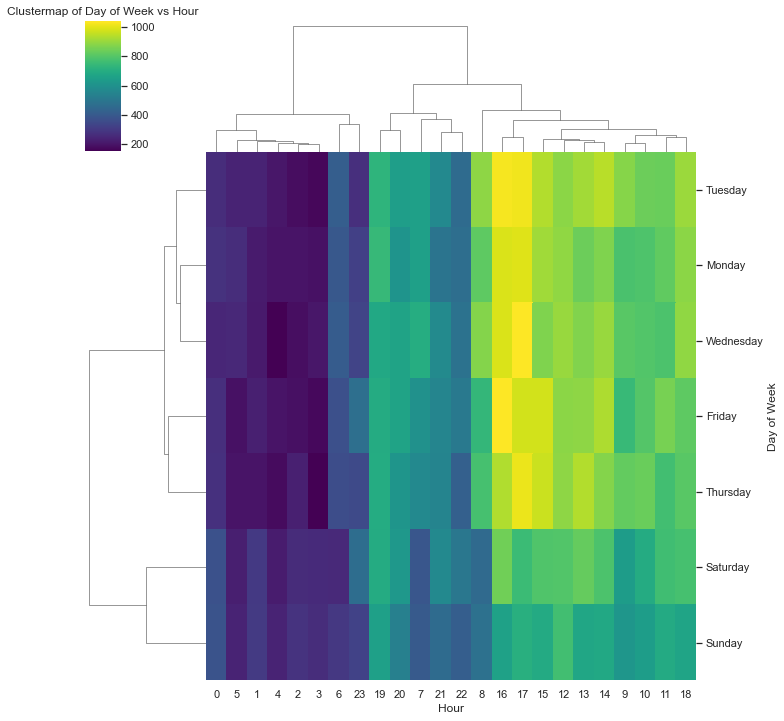

In [166]:
plt.figure(figsize=(8,7))
sns.clustermap(data=df1,cmap="viridis")
plt.title("Clustermap of Day of Week vs Hour")

# It seems most calls happen in the evening.

** Now I will repeat these same plots and operations, for a DataFrame that shows the Month as the column. **

In [167]:
df.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reason,Day of Week,Hour,Month,Date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,Thursday,17,12,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,Thursday,17,12,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,Thursday,17,12,2015-12-10


In [168]:
df.groupby(by=["Day of Week","Month"]).count()

lat   lng  desc   zip  title  timeStamp   twp  addr     e  \
Day of Week Month                                                               
Friday      1      1970  1970  1970  1736   1970       1970  1970  1955  1970   
            2      1581  1581  1581  1362   1581       1581  1581  1566  1581   
            3      1525  1525  1525  1332   1525       1525  1523  1519  1525   
            4      1958  1958  1958  1684   1958       1958  1958  1948  1958   
            5      1730  1730  1730  1504   1730       1730  1730  1720  1730   
...                 ...   ...   ...   ...    ...        ...   ...   ...   ...   
Wednesday   5      1538  1538  1538  1350   1538       1538  1538  1533  1538   
            6      2058  2058  2058  1794   2058       2058  2054  2046  2058   
            7      1717  1717  1717  1504   1717       1717  1715  1711  1717   
            8      1295  1295  1295  1106   1295       1295  1295  1287  1295   
            12     1262  1262  1262  1081   1262       1262  1260  1249  1262   

                   Reason  Hour  Date  
Day of Week Month                      
Friday      1        1970  1970  1970  
            2        1581  1581  1581  
            3        1525  1525  1525  
            4        1958  1958  1958  
            5        1730  1730  1730  
...                   ...   ...   ...  
Wednesday   5        1538  1538  1538  
            6        2058  2058  2058  
            7        1717  1717  1717  
            8        1295  1295  1295  
            12       1262  1262  1262  

[63 rows x 12 columns]

In [169]:
df.groupby(by=["Day of Week","Month"]).count()["Reason"]

Day of Week  Month
Friday       1        1970
             2        1581
             3        1525
             4        1958
             5        1730
                      ... 
Wednesday    5        1538
             6        2058
             7        1717
             8        1295
             12       1262
Name: Reason, Length: 63, dtype: int64

In [170]:
df1 = df.groupby(by=["Day of Week","Month"]).count()["Reason"].unstack(level=-1)
df1

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Friday,1970,1581,1525,1958,1730,1649,2045,1310,1065
Monday,1727,1964,1535,1598,1779,1617,1692,1511,1257
Saturday,2291,1441,1266,1734,1444,1388,1695,1099,978
Sunday,1960,1229,1102,1488,1424,1333,1672,1021,907
Thursday,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tuesday,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wednesday,1700,1903,1889,1517,1538,2058,1717,1295,1262


Text(0.5, 1.0, 'Day of Week vs Month')

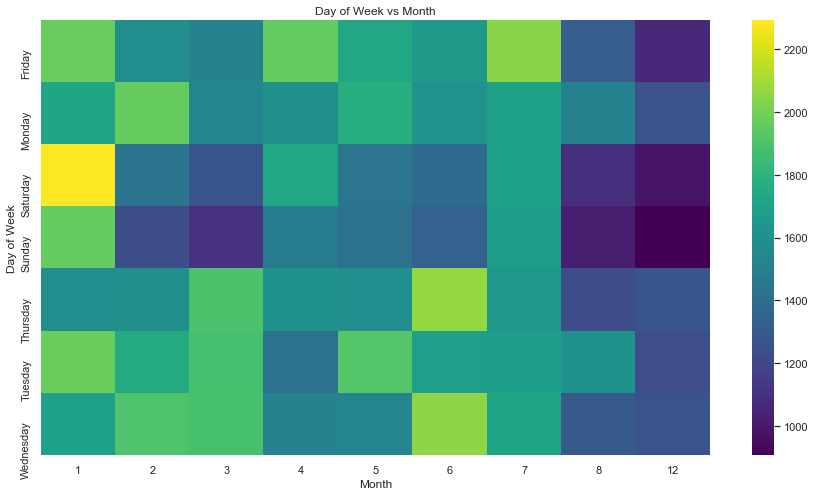

In [171]:
fig,axes = plt.subplots(nrows=1,ncols=1,figsize=(15,8))
sns.heatmap(data=df1,cmap="viridis")
axes.set_title("Day of Week vs Month")

Text(0.5, 1.0, 'CLUSTERMAP:\nDay of Week vs Month')

<Figure size 576x504 with 0 Axes>

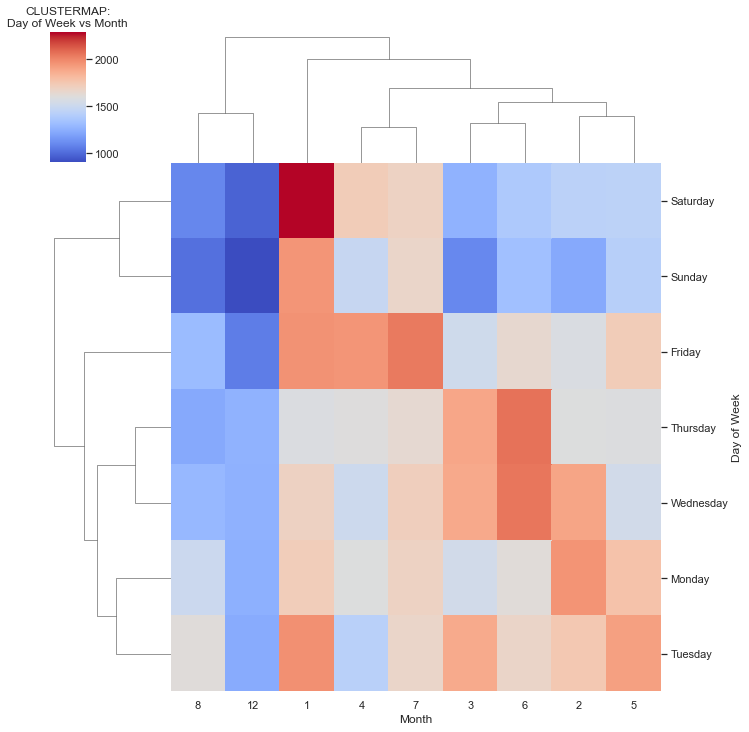

In [172]:
plt.figure(figsize=(8,7))
sns.clustermap(data=df1,cmap="coolwarm")
plt.title("CLUSTERMAP:\nDay of Week vs Month")

**It is much clearer now the relation between Hours and Months vs Day of Weeks which are most popular for 911 calls**